In [1]:
import pandas as pd, numpy as np
from datetime import datetime
# import yfinance as yf
import tushare as ts
import time, urllib
ts.set_token('2f31c3932ead9fcc3830879132cc3ec8df3566550f711889d4a30f67')
import glob
import os

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=False, rc=None)

https://pypi.org/project/yfinance/

# Chinese ETF

https://zhuanlan.zhihu.com/p/24920904

# 1. Extracting Data

In [2]:
today = str(datetime.now().date())

def get_data(code,start='20100101',end=today):
    df = ts.pro_bar(ts_code=code, adj='qfq', start_date=start, end_date=end)
    return df

#获取当前交易日最新的股票代码和简称
def get_code():
    codes = pro.stock_basic(list_status='L').ts_code.values
    return codes

#设置token
token='2f31c3932ead9fcc3830879132cc3ec8df3566550f711889d4a30f67'
pro = ts.pro_api(token)
codes = get_code()

In [3]:
len(codes)

3739

In [4]:
import eventlet
eventlet.monkey_patch()

ch_db_path = "/Users/miaoyuesun/Code_Workspace/brad_public_workspace_mac/data/CH_database/"

ticker_list = codes
today = str(datetime.now().date())
start = '2010-01-01'
end = today
for ticker in ticker_list:
    if not os.path.exists(ch_db_path+ticker+".csv"):
        print("{} is new, start downloading now...".format(ticker))
        try:
            data = get_data(ticker)
            data['trade_date'] = data['trade_date'].astype(str)
            data['trade_date'] = data['trade_date'].apply(lambda x:x[:4]+"-"+x[4:6]+"-"+x[6:])
            data.sort_values("trade_date", inplace = True)
            data.to_csv(ch_db_path+ticker+".csv", index = False)
            print("{} data file created: {}".format(ticker, end))
        except Exception as e:
            print(e)
            
    else:
        print("Already have data csv for {}".format(ticker))
        hist_data = pd.read_csv(ch_db_path+ticker+".csv")   
        try:
            hist_data_last_date = hist_data['trade_date'].values[-1]        
            if today > hist_data_last_date:
                print("Needs to update, start updating new data for {} now...".format(ticker))
                update_start = hist_data_last_date
                update_end = today
                with eventlet.Timeout(60,False):
                    try:
                        new_data = get_data(ticker, update_start, update_end)
                        new_data['trade_date'] = new_data['trade_date'].astype(str)
                        new_data['trade_date'] = new_data['trade_date'].apply(lambda x:x[:4]+"-"+x[4:6]+"-"+x[6:])
                        new_data.to_csv(ch_db_path+ticker+".csv", mode='a', header=False, index = False)
                        updated_duplicated_df = pd.read_csv(ch_db_path+ticker+".csv")
                        updated_df = updated_duplicated_df.drop_duplicates("trade_date")
                        updated_df.sort_values("trade_date", inplace = True)
                        updated_df.to_csv(ch_db_path+ticker+".csv", index = False)
                        print("New data updated till today for {}!".format(ticker))
                    except Exception as e:
                        print(e)
    #             print("Timed Out: Update Failed!")
            else:
                print("There's no new data to update for {}.".format(ticker))
        except Exception as e:
            print(e)

#     print("Data Download/Update for {} is Finished.".format(ticker))
    print("===============================================")
    
print("【Updated Finished for today!】")

Already have data csv for 000001.SZ
Needs to update, start updating new data for 000001.SZ now...


/Users/miaoyuesun/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


New data updated till today for 000001.SZ!
Already have data csv for 000002.SZ
Needs to update, start updating new data for 000002.SZ now...
New data updated till today for 000002.SZ!
Already have data csv for 000004.SZ
Needs to update, start updating new data for 000004.SZ now...
New data updated till today for 000004.SZ!
Already have data csv for 000005.SZ
Needs to update, start updating new data for 000005.SZ now...
New data updated till today for 000005.SZ!
Already have data csv for 000006.SZ
Needs to update, start updating new data for 000006.SZ now...
New data updated till today for 000006.SZ!
Already have data csv for 000007.SZ
Needs to update, start updating new data for 000007.SZ now...
New data updated till today for 000007.SZ!
Already have data csv for 000008.SZ
Needs to update, start updating new data for 000008.SZ now...
New data updated till today for 000008.SZ!
Already have data csv for 000009.SZ
Needs to update, start updating new data for 000009.SZ now...
New data upda

New data updated till today for 000059.SZ!
Already have data csv for 000060.SZ
Needs to update, start updating new data for 000060.SZ now...
New data updated till today for 000060.SZ!
Already have data csv for 000061.SZ
Needs to update, start updating new data for 000061.SZ now...
New data updated till today for 000061.SZ!
Already have data csv for 000062.SZ
Needs to update, start updating new data for 000062.SZ now...
New data updated till today for 000062.SZ!
Already have data csv for 000063.SZ
Needs to update, start updating new data for 000063.SZ now...
New data updated till today for 000063.SZ!
Already have data csv for 000065.SZ
Needs to update, start updating new data for 000065.SZ now...
New data updated till today for 000065.SZ!
Already have data csv for 000066.SZ
Needs to update, start updating new data for 000066.SZ now...
New data updated till today for 000066.SZ!
Already have data csv for 000068.SZ
Needs to update, start updating new data for 000068.SZ now...
New data upda

New data updated till today for 000420.SZ!
Already have data csv for 000421.SZ
Needs to update, start updating new data for 000421.SZ now...
New data updated till today for 000421.SZ!
Already have data csv for 000422.SZ
Needs to update, start updating new data for 000422.SZ now...
New data updated till today for 000422.SZ!
Already have data csv for 000423.SZ
Needs to update, start updating new data for 000423.SZ now...
New data updated till today for 000423.SZ!
Already have data csv for 000425.SZ
Needs to update, start updating new data for 000425.SZ now...
New data updated till today for 000425.SZ!
Already have data csv for 000426.SZ
Needs to update, start updating new data for 000426.SZ now...
New data updated till today for 000426.SZ!
Already have data csv for 000428.SZ
Needs to update, start updating new data for 000428.SZ now...
New data updated till today for 000428.SZ!
Already have data csv for 000429.SZ
Needs to update, start updating new data for 000429.SZ now...
New data upda

New data updated till today for 000541.SZ!
Already have data csv for 000543.SZ
Needs to update, start updating new data for 000543.SZ now...
New data updated till today for 000543.SZ!
Already have data csv for 000544.SZ
Needs to update, start updating new data for 000544.SZ now...
New data updated till today for 000544.SZ!
Already have data csv for 000545.SZ
Needs to update, start updating new data for 000545.SZ now...
New data updated till today for 000545.SZ!
Already have data csv for 000546.SZ
Needs to update, start updating new data for 000546.SZ now...
New data updated till today for 000546.SZ!
Already have data csv for 000547.SZ
Needs to update, start updating new data for 000547.SZ now...
New data updated till today for 000547.SZ!
Already have data csv for 000548.SZ
Needs to update, start updating new data for 000548.SZ now...
New data updated till today for 000548.SZ!
Already have data csv for 000550.SZ
Needs to update, start updating new data for 000550.SZ now...
New data upda

New data updated till today for 000599.SZ!
Already have data csv for 000600.SZ
Needs to update, start updating new data for 000600.SZ now...
New data updated till today for 000600.SZ!
Already have data csv for 000601.SZ
Needs to update, start updating new data for 000601.SZ now...
New data updated till today for 000601.SZ!
Already have data csv for 000603.SZ
Needs to update, start updating new data for 000603.SZ now...
New data updated till today for 000603.SZ!
Already have data csv for 000605.SZ
Needs to update, start updating new data for 000605.SZ now...
New data updated till today for 000605.SZ!
Already have data csv for 000606.SZ
Needs to update, start updating new data for 000606.SZ now...
New data updated till today for 000606.SZ!
Already have data csv for 000607.SZ
Needs to update, start updating new data for 000607.SZ now...
New data updated till today for 000607.SZ!
Already have data csv for 000608.SZ
Needs to update, start updating new data for 000608.SZ now...
New data upda

New data updated till today for 000665.SZ!
Already have data csv for 000666.SZ
Needs to update, start updating new data for 000666.SZ now...
New data updated till today for 000666.SZ!
Already have data csv for 000667.SZ
Needs to update, start updating new data for 000667.SZ now...
New data updated till today for 000667.SZ!
Already have data csv for 000668.SZ
Needs to update, start updating new data for 000668.SZ now...
New data updated till today for 000668.SZ!
Already have data csv for 000669.SZ
Needs to update, start updating new data for 000669.SZ now...
New data updated till today for 000669.SZ!
Already have data csv for 000670.SZ
Needs to update, start updating new data for 000670.SZ now...
New data updated till today for 000670.SZ!
Already have data csv for 000671.SZ
Needs to update, start updating new data for 000671.SZ now...
New data updated till today for 000671.SZ!
Already have data csv for 000672.SZ
Needs to update, start updating new data for 000672.SZ now...
New data upda

New data updated till today for 000720.SZ!
Already have data csv for 000721.SZ
Needs to update, start updating new data for 000721.SZ now...
New data updated till today for 000721.SZ!
Already have data csv for 000722.SZ
Needs to update, start updating new data for 000722.SZ now...
New data updated till today for 000722.SZ!
Already have data csv for 000723.SZ
Needs to update, start updating new data for 000723.SZ now...
New data updated till today for 000723.SZ!
Already have data csv for 000725.SZ
Needs to update, start updating new data for 000725.SZ now...
New data updated till today for 000725.SZ!
Already have data csv for 000726.SZ
Needs to update, start updating new data for 000726.SZ now...
New data updated till today for 000726.SZ!
Already have data csv for 000727.SZ
Needs to update, start updating new data for 000727.SZ now...
New data updated till today for 000727.SZ!
Already have data csv for 000728.SZ
Needs to update, start updating new data for 000728.SZ now...
New data upda

New data updated till today for 000791.SZ!
Already have data csv for 000792.SZ
Needs to update, start updating new data for 000792.SZ now...
New data updated till today for 000792.SZ!
Already have data csv for 000793.SZ
Needs to update, start updating new data for 000793.SZ now...
New data updated till today for 000793.SZ!
Already have data csv for 000795.SZ
Needs to update, start updating new data for 000795.SZ now...
New data updated till today for 000795.SZ!
Already have data csv for 000796.SZ
Needs to update, start updating new data for 000796.SZ now...
New data updated till today for 000796.SZ!
Already have data csv for 000797.SZ
Needs to update, start updating new data for 000797.SZ now...
New data updated till today for 000797.SZ!
Already have data csv for 000798.SZ
Needs to update, start updating new data for 000798.SZ now...
New data updated till today for 000798.SZ!
Already have data csv for 000799.SZ
Needs to update, start updating new data for 000799.SZ now...
New data upda

New data updated till today for 000858.SZ!
Already have data csv for 000859.SZ
Needs to update, start updating new data for 000859.SZ now...
New data updated till today for 000859.SZ!
Already have data csv for 000860.SZ
Needs to update, start updating new data for 000860.SZ now...
New data updated till today for 000860.SZ!
Already have data csv for 000861.SZ
Needs to update, start updating new data for 000861.SZ now...
New data updated till today for 000861.SZ!
Already have data csv for 000862.SZ
Needs to update, start updating new data for 000862.SZ now...
New data updated till today for 000862.SZ!
Already have data csv for 000863.SZ
Needs to update, start updating new data for 000863.SZ now...
New data updated till today for 000863.SZ!
Already have data csv for 000868.SZ
Needs to update, start updating new data for 000868.SZ now...
New data updated till today for 000868.SZ!
Already have data csv for 000869.SZ
Needs to update, start updating new data for 000869.SZ now...
New data upda

New data updated till today for 000920.SZ!
Already have data csv for 000921.SZ
Needs to update, start updating new data for 000921.SZ now...
New data updated till today for 000921.SZ!
Already have data csv for 000922.SZ
Needs to update, start updating new data for 000922.SZ now...
New data updated till today for 000922.SZ!
Already have data csv for 000923.SZ
Needs to update, start updating new data for 000923.SZ now...
New data updated till today for 000923.SZ!
Already have data csv for 000925.SZ
Needs to update, start updating new data for 000925.SZ now...
New data updated till today for 000925.SZ!
Already have data csv for 000926.SZ
Needs to update, start updating new data for 000926.SZ now...
New data updated till today for 000926.SZ!
Already have data csv for 000927.SZ
Needs to update, start updating new data for 000927.SZ now...
New data updated till today for 000927.SZ!
Already have data csv for 000928.SZ
Needs to update, start updating new data for 000928.SZ now...
New data upda

New data updated till today for 000980.SZ!
Already have data csv for 000981.SZ
Needs to update, start updating new data for 000981.SZ now...
New data updated till today for 000981.SZ!
Already have data csv for 000982.SZ
Needs to update, start updating new data for 000982.SZ now...
New data updated till today for 000982.SZ!
Already have data csv for 000983.SZ
Needs to update, start updating new data for 000983.SZ now...
New data updated till today for 000983.SZ!
Already have data csv for 000985.SZ
Needs to update, start updating new data for 000985.SZ now...
New data updated till today for 000985.SZ!
Already have data csv for 000987.SZ
Needs to update, start updating new data for 000987.SZ now...
New data updated till today for 000987.SZ!
Already have data csv for 000988.SZ
Needs to update, start updating new data for 000988.SZ now...
New data updated till today for 000988.SZ!
Already have data csv for 000989.SZ
Needs to update, start updating new data for 000989.SZ now...
New data upda

New data updated till today for 002027.SZ!
Already have data csv for 002028.SZ
Needs to update, start updating new data for 002028.SZ now...
New data updated till today for 002028.SZ!
Already have data csv for 002029.SZ
Needs to update, start updating new data for 002029.SZ now...
New data updated till today for 002029.SZ!
Already have data csv for 002030.SZ
Needs to update, start updating new data for 002030.SZ now...
New data updated till today for 002030.SZ!
Already have data csv for 002031.SZ
Needs to update, start updating new data for 002031.SZ now...
New data updated till today for 002031.SZ!
Already have data csv for 002032.SZ
Needs to update, start updating new data for 002032.SZ now...
New data updated till today for 002032.SZ!
Already have data csv for 002033.SZ
Needs to update, start updating new data for 002033.SZ now...
New data updated till today for 002033.SZ!
Already have data csv for 002034.SZ
Needs to update, start updating new data for 002034.SZ now...
New data upda

New data updated till today for 002072.SZ!
Already have data csv for 002073.SZ
Needs to update, start updating new data for 002073.SZ now...
New data updated till today for 002073.SZ!
Already have data csv for 002074.SZ
Needs to update, start updating new data for 002074.SZ now...
New data updated till today for 002074.SZ!
Already have data csv for 002075.SZ
Needs to update, start updating new data for 002075.SZ now...
New data updated till today for 002075.SZ!
Already have data csv for 002076.SZ
Needs to update, start updating new data for 002076.SZ now...
New data updated till today for 002076.SZ!
Already have data csv for 002077.SZ
Needs to update, start updating new data for 002077.SZ now...
New data updated till today for 002077.SZ!
Already have data csv for 002078.SZ
Needs to update, start updating new data for 002078.SZ now...
New data updated till today for 002078.SZ!
Already have data csv for 002079.SZ
Needs to update, start updating new data for 002079.SZ now...
New data upda

New data updated till today for 002116.SZ!
Already have data csv for 002117.SZ
Needs to update, start updating new data for 002117.SZ now...
New data updated till today for 002117.SZ!
Already have data csv for 002118.SZ
Needs to update, start updating new data for 002118.SZ now...
New data updated till today for 002118.SZ!
Already have data csv for 002119.SZ
Needs to update, start updating new data for 002119.SZ now...
New data updated till today for 002119.SZ!
Already have data csv for 002120.SZ
Needs to update, start updating new data for 002120.SZ now...
New data updated till today for 002120.SZ!
Already have data csv for 002121.SZ
Needs to update, start updating new data for 002121.SZ now...
New data updated till today for 002121.SZ!
Already have data csv for 002122.SZ
Needs to update, start updating new data for 002122.SZ now...
New data updated till today for 002122.SZ!
Already have data csv for 002123.SZ
Needs to update, start updating new data for 002123.SZ now...
New data upda

New data updated till today for 002161.SZ!
Already have data csv for 002162.SZ
Needs to update, start updating new data for 002162.SZ now...
New data updated till today for 002162.SZ!
Already have data csv for 002163.SZ
Needs to update, start updating new data for 002163.SZ now...
New data updated till today for 002163.SZ!
Already have data csv for 002164.SZ
Needs to update, start updating new data for 002164.SZ now...
New data updated till today for 002164.SZ!
Already have data csv for 002165.SZ
Needs to update, start updating new data for 002165.SZ now...
New data updated till today for 002165.SZ!
Already have data csv for 002166.SZ
Needs to update, start updating new data for 002166.SZ now...
New data updated till today for 002166.SZ!
Already have data csv for 002167.SZ
Needs to update, start updating new data for 002167.SZ now...
New data updated till today for 002167.SZ!
Already have data csv for 002168.SZ
Needs to update, start updating new data for 002168.SZ now...
New data upda

New data updated till today for 002205.SZ!
Already have data csv for 002206.SZ
Needs to update, start updating new data for 002206.SZ now...
New data updated till today for 002206.SZ!
Already have data csv for 002207.SZ
Needs to update, start updating new data for 002207.SZ now...
New data updated till today for 002207.SZ!
Already have data csv for 002208.SZ
Needs to update, start updating new data for 002208.SZ now...
New data updated till today for 002208.SZ!
Already have data csv for 002209.SZ
Needs to update, start updating new data for 002209.SZ now...
New data updated till today for 002209.SZ!
Already have data csv for 002210.SZ
Needs to update, start updating new data for 002210.SZ now...
New data updated till today for 002210.SZ!
Already have data csv for 002211.SZ
Needs to update, start updating new data for 002211.SZ now...
New data updated till today for 002211.SZ!
Already have data csv for 002212.SZ
Needs to update, start updating new data for 002212.SZ now...
New data upda

New data updated till today for 002249.SZ!
Already have data csv for 002250.SZ
Needs to update, start updating new data for 002250.SZ now...
New data updated till today for 002250.SZ!
Already have data csv for 002251.SZ
Needs to update, start updating new data for 002251.SZ now...
New data updated till today for 002251.SZ!
Already have data csv for 002252.SZ
Needs to update, start updating new data for 002252.SZ now...
New data updated till today for 002252.SZ!
Already have data csv for 002253.SZ
Needs to update, start updating new data for 002253.SZ now...
New data updated till today for 002253.SZ!
Already have data csv for 002254.SZ
Needs to update, start updating new data for 002254.SZ now...
New data updated till today for 002254.SZ!
Already have data csv for 002255.SZ
Needs to update, start updating new data for 002255.SZ now...
New data updated till today for 002255.SZ!
Already have data csv for 002256.SZ
Needs to update, start updating new data for 002256.SZ now...
New data upda

New data updated till today for 002295.SZ!
Already have data csv for 002296.SZ
Needs to update, start updating new data for 002296.SZ now...
New data updated till today for 002296.SZ!
Already have data csv for 002297.SZ
Needs to update, start updating new data for 002297.SZ now...
New data updated till today for 002297.SZ!
Already have data csv for 002298.SZ
Needs to update, start updating new data for 002298.SZ now...
New data updated till today for 002298.SZ!
Already have data csv for 002299.SZ
Needs to update, start updating new data for 002299.SZ now...
New data updated till today for 002299.SZ!
Already have data csv for 002300.SZ
Needs to update, start updating new data for 002300.SZ now...
New data updated till today for 002300.SZ!
Already have data csv for 002301.SZ
Needs to update, start updating new data for 002301.SZ now...
New data updated till today for 002301.SZ!
Already have data csv for 002302.SZ
Needs to update, start updating new data for 002302.SZ now...
New data upda

New data updated till today for 002339.SZ!
Already have data csv for 002340.SZ
Needs to update, start updating new data for 002340.SZ now...
New data updated till today for 002340.SZ!
Already have data csv for 002341.SZ
Needs to update, start updating new data for 002341.SZ now...
New data updated till today for 002341.SZ!
Already have data csv for 002342.SZ
Needs to update, start updating new data for 002342.SZ now...
New data updated till today for 002342.SZ!
Already have data csv for 002343.SZ
Needs to update, start updating new data for 002343.SZ now...
New data updated till today for 002343.SZ!
Already have data csv for 002344.SZ
Needs to update, start updating new data for 002344.SZ now...
New data updated till today for 002344.SZ!
Already have data csv for 002345.SZ
Needs to update, start updating new data for 002345.SZ now...
New data updated till today for 002345.SZ!
Already have data csv for 002346.SZ
Needs to update, start updating new data for 002346.SZ now...
New data upda

New data updated till today for 002383.SZ!
Already have data csv for 002384.SZ
Needs to update, start updating new data for 002384.SZ now...
New data updated till today for 002384.SZ!
Already have data csv for 002385.SZ
Needs to update, start updating new data for 002385.SZ now...
New data updated till today for 002385.SZ!
Already have data csv for 002386.SZ
Needs to update, start updating new data for 002386.SZ now...
New data updated till today for 002386.SZ!
Already have data csv for 002387.SZ
Needs to update, start updating new data for 002387.SZ now...
New data updated till today for 002387.SZ!
Already have data csv for 002388.SZ
Needs to update, start updating new data for 002388.SZ now...
New data updated till today for 002388.SZ!
Already have data csv for 002389.SZ
Needs to update, start updating new data for 002389.SZ now...
New data updated till today for 002389.SZ!
Already have data csv for 002390.SZ
Needs to update, start updating new data for 002390.SZ now...
New data upda

New data updated till today for 002427.SZ!
Already have data csv for 002428.SZ
Needs to update, start updating new data for 002428.SZ now...
New data updated till today for 002428.SZ!
Already have data csv for 002429.SZ
Needs to update, start updating new data for 002429.SZ now...
New data updated till today for 002429.SZ!
Already have data csv for 002430.SZ
Needs to update, start updating new data for 002430.SZ now...
New data updated till today for 002430.SZ!
Already have data csv for 002431.SZ
Needs to update, start updating new data for 002431.SZ now...
New data updated till today for 002431.SZ!
Already have data csv for 002432.SZ
Needs to update, start updating new data for 002432.SZ now...
New data updated till today for 002432.SZ!
Already have data csv for 002433.SZ
Needs to update, start updating new data for 002433.SZ now...
New data updated till today for 002433.SZ!
Already have data csv for 002434.SZ
Needs to update, start updating new data for 002434.SZ now...
New data upda

New data updated till today for 002471.SZ!
Already have data csv for 002472.SZ
Needs to update, start updating new data for 002472.SZ now...
New data updated till today for 002472.SZ!
Already have data csv for 002473.SZ
Needs to update, start updating new data for 002473.SZ now...
New data updated till today for 002473.SZ!
Already have data csv for 002474.SZ
Needs to update, start updating new data for 002474.SZ now...
New data updated till today for 002474.SZ!
Already have data csv for 002475.SZ
Needs to update, start updating new data for 002475.SZ now...
New data updated till today for 002475.SZ!
Already have data csv for 002476.SZ
Needs to update, start updating new data for 002476.SZ now...
New data updated till today for 002476.SZ!
Already have data csv for 002478.SZ
Needs to update, start updating new data for 002478.SZ now...
New data updated till today for 002478.SZ!
Already have data csv for 002479.SZ
Needs to update, start updating new data for 002479.SZ now...
New data upda

New data updated till today for 002516.SZ!
Already have data csv for 002517.SZ
Needs to update, start updating new data for 002517.SZ now...
New data updated till today for 002517.SZ!
Already have data csv for 002518.SZ
Needs to update, start updating new data for 002518.SZ now...
New data updated till today for 002518.SZ!
Already have data csv for 002519.SZ
Needs to update, start updating new data for 002519.SZ now...
New data updated till today for 002519.SZ!
Already have data csv for 002520.SZ
Needs to update, start updating new data for 002520.SZ now...
New data updated till today for 002520.SZ!
Already have data csv for 002521.SZ
Needs to update, start updating new data for 002521.SZ now...
New data updated till today for 002521.SZ!
Already have data csv for 002522.SZ
Needs to update, start updating new data for 002522.SZ now...
New data updated till today for 002522.SZ!
Already have data csv for 002523.SZ
Needs to update, start updating new data for 002523.SZ now...
New data upda

New data updated till today for 002561.SZ!
Already have data csv for 002562.SZ
Needs to update, start updating new data for 002562.SZ now...
New data updated till today for 002562.SZ!
Already have data csv for 002563.SZ
Needs to update, start updating new data for 002563.SZ now...
New data updated till today for 002563.SZ!
Already have data csv for 002564.SZ
Needs to update, start updating new data for 002564.SZ now...
New data updated till today for 002564.SZ!
Already have data csv for 002565.SZ
Needs to update, start updating new data for 002565.SZ now...
New data updated till today for 002565.SZ!
Already have data csv for 002566.SZ
Needs to update, start updating new data for 002566.SZ now...
New data updated till today for 002566.SZ!
Already have data csv for 002567.SZ
Needs to update, start updating new data for 002567.SZ now...
New data updated till today for 002567.SZ!
Already have data csv for 002568.SZ
Needs to update, start updating new data for 002568.SZ now...
New data upda

New data updated till today for 002606.SZ!
Already have data csv for 002607.SZ
Needs to update, start updating new data for 002607.SZ now...
New data updated till today for 002607.SZ!
Already have data csv for 002608.SZ
Needs to update, start updating new data for 002608.SZ now...
New data updated till today for 002608.SZ!
Already have data csv for 002609.SZ
Needs to update, start updating new data for 002609.SZ now...
New data updated till today for 002609.SZ!
Already have data csv for 002610.SZ
Needs to update, start updating new data for 002610.SZ now...
New data updated till today for 002610.SZ!
Already have data csv for 002611.SZ
Needs to update, start updating new data for 002611.SZ now...
New data updated till today for 002611.SZ!
Already have data csv for 002612.SZ
Needs to update, start updating new data for 002612.SZ now...
New data updated till today for 002612.SZ!
Already have data csv for 002613.SZ
Needs to update, start updating new data for 002613.SZ now...
New data upda

New data updated till today for 002650.SZ!
Already have data csv for 002651.SZ
Needs to update, start updating new data for 002651.SZ now...
New data updated till today for 002651.SZ!
Already have data csv for 002652.SZ
Needs to update, start updating new data for 002652.SZ now...
New data updated till today for 002652.SZ!
Already have data csv for 002653.SZ
Needs to update, start updating new data for 002653.SZ now...
New data updated till today for 002653.SZ!
Already have data csv for 002654.SZ
Needs to update, start updating new data for 002654.SZ now...
New data updated till today for 002654.SZ!
Already have data csv for 002655.SZ
Needs to update, start updating new data for 002655.SZ now...
New data updated till today for 002655.SZ!
Already have data csv for 002656.SZ
Needs to update, start updating new data for 002656.SZ now...
New data updated till today for 002656.SZ!
Already have data csv for 002657.SZ
Needs to update, start updating new data for 002657.SZ now...
New data upda

New data updated till today for 002695.SZ!
Already have data csv for 002696.SZ
Needs to update, start updating new data for 002696.SZ now...
New data updated till today for 002696.SZ!
Already have data csv for 002697.SZ
Needs to update, start updating new data for 002697.SZ now...
New data updated till today for 002697.SZ!
Already have data csv for 002698.SZ
Needs to update, start updating new data for 002698.SZ now...
New data updated till today for 002698.SZ!
Already have data csv for 002699.SZ
Needs to update, start updating new data for 002699.SZ now...
New data updated till today for 002699.SZ!
Already have data csv for 002700.SZ
Needs to update, start updating new data for 002700.SZ now...
New data updated till today for 002700.SZ!
Already have data csv for 002701.SZ
Needs to update, start updating new data for 002701.SZ now...
New data updated till today for 002701.SZ!
Already have data csv for 002702.SZ
Needs to update, start updating new data for 002702.SZ now...
New data upda

New data updated till today for 002742.SZ!
Already have data csv for 002743.SZ
Needs to update, start updating new data for 002743.SZ now...
New data updated till today for 002743.SZ!
Already have data csv for 002745.SZ
Needs to update, start updating new data for 002745.SZ now...
New data updated till today for 002745.SZ!
Already have data csv for 002746.SZ
Needs to update, start updating new data for 002746.SZ now...
New data updated till today for 002746.SZ!
Already have data csv for 002747.SZ
Needs to update, start updating new data for 002747.SZ now...
New data updated till today for 002747.SZ!
Already have data csv for 002748.SZ
Needs to update, start updating new data for 002748.SZ now...
New data updated till today for 002748.SZ!
Already have data csv for 002749.SZ
Needs to update, start updating new data for 002749.SZ now...
New data updated till today for 002749.SZ!
Already have data csv for 002750.SZ
Needs to update, start updating new data for 002750.SZ now...
New data upda

New data updated till today for 002790.SZ!
Already have data csv for 002791.SZ
Needs to update, start updating new data for 002791.SZ now...
New data updated till today for 002791.SZ!
Already have data csv for 002792.SZ
Needs to update, start updating new data for 002792.SZ now...
New data updated till today for 002792.SZ!
Already have data csv for 002793.SZ
Needs to update, start updating new data for 002793.SZ now...
New data updated till today for 002793.SZ!
Already have data csv for 002795.SZ
Needs to update, start updating new data for 002795.SZ now...
New data updated till today for 002795.SZ!
Already have data csv for 002796.SZ
Needs to update, start updating new data for 002796.SZ now...
New data updated till today for 002796.SZ!
Already have data csv for 002797.SZ
Needs to update, start updating new data for 002797.SZ now...
New data updated till today for 002797.SZ!
Already have data csv for 002798.SZ
Needs to update, start updating new data for 002798.SZ now...
New data upda

New data updated till today for 002838.SZ!
Already have data csv for 002839.SZ
Needs to update, start updating new data for 002839.SZ now...
New data updated till today for 002839.SZ!
Already have data csv for 002840.SZ
Needs to update, start updating new data for 002840.SZ now...
New data updated till today for 002840.SZ!
Already have data csv for 002841.SZ
Needs to update, start updating new data for 002841.SZ now...
New data updated till today for 002841.SZ!
Already have data csv for 002842.SZ
Needs to update, start updating new data for 002842.SZ now...
New data updated till today for 002842.SZ!
Already have data csv for 002843.SZ
Needs to update, start updating new data for 002843.SZ now...
New data updated till today for 002843.SZ!
Already have data csv for 002845.SZ
Needs to update, start updating new data for 002845.SZ now...
New data updated till today for 002845.SZ!
Already have data csv for 002846.SZ
Needs to update, start updating new data for 002846.SZ now...
New data upda

New data updated till today for 002885.SZ!
Already have data csv for 002886.SZ
Needs to update, start updating new data for 002886.SZ now...
New data updated till today for 002886.SZ!
Already have data csv for 002887.SZ
Needs to update, start updating new data for 002887.SZ now...
New data updated till today for 002887.SZ!
Already have data csv for 002888.SZ
Needs to update, start updating new data for 002888.SZ now...
New data updated till today for 002888.SZ!
Already have data csv for 002889.SZ
Needs to update, start updating new data for 002889.SZ now...
New data updated till today for 002889.SZ!
Already have data csv for 002890.SZ
Needs to update, start updating new data for 002890.SZ now...
New data updated till today for 002890.SZ!
Already have data csv for 002891.SZ
Needs to update, start updating new data for 002891.SZ now...
New data updated till today for 002891.SZ!
Already have data csv for 002892.SZ
Needs to update, start updating new data for 002892.SZ now...
New data upda

New data updated till today for 002933.SZ!
Already have data csv for 002935.SZ
Needs to update, start updating new data for 002935.SZ now...
New data updated till today for 002935.SZ!
Already have data csv for 002936.SZ
Needs to update, start updating new data for 002936.SZ now...
New data updated till today for 002936.SZ!
Already have data csv for 002937.SZ
Needs to update, start updating new data for 002937.SZ now...
New data updated till today for 002937.SZ!
Already have data csv for 002938.SZ
Needs to update, start updating new data for 002938.SZ now...
New data updated till today for 002938.SZ!
Already have data csv for 002939.SZ
Needs to update, start updating new data for 002939.SZ now...
New data updated till today for 002939.SZ!
Already have data csv for 002940.SZ
Needs to update, start updating new data for 002940.SZ now...
New data updated till today for 002940.SZ!
Already have data csv for 002941.SZ
Needs to update, start updating new data for 002941.SZ now...
New data upda

Already have data csv for 300030.SZ
unorderable types: numpy.ndarray() < str()
Already have data csv for 300031.SZ
unorderable types: numpy.ndarray() < str()
Already have data csv for 300032.SZ
unorderable types: numpy.ndarray() < str()
Already have data csv for 300033.SZ
unorderable types: numpy.ndarray() < str()
Already have data csv for 300034.SZ
unorderable types: numpy.ndarray() < str()
Already have data csv for 300035.SZ
unorderable types: numpy.ndarray() < str()
Already have data csv for 300036.SZ
unorderable types: numpy.ndarray() < str()
Already have data csv for 300037.SZ
unorderable types: numpy.ndarray() < str()
Already have data csv for 300038.SZ
unorderable types: numpy.ndarray() < str()
Already have data csv for 300039.SZ
unorderable types: numpy.ndarray() < str()
Already have data csv for 300040.SZ
unorderable types: numpy.ndarray() < str()
Already have data csv for 300041.SZ
unorderable types: numpy.ndarray() < str()
Already have data csv for 300042.SZ
unorderable type

unorderable types: numpy.ndarray() < str()
Already have data csv for 300119.SZ
unorderable types: numpy.ndarray() < str()
Already have data csv for 300120.SZ
unorderable types: numpy.ndarray() < str()
Already have data csv for 300121.SZ
unorderable types: numpy.ndarray() < str()
Already have data csv for 300122.SZ
unorderable types: numpy.ndarray() < str()
Already have data csv for 300123.SZ
unorderable types: numpy.ndarray() < str()
Already have data csv for 300124.SZ
unorderable types: numpy.ndarray() < str()
Already have data csv for 300125.SZ
unorderable types: numpy.ndarray() < str()
Already have data csv for 300126.SZ
unorderable types: numpy.ndarray() < str()
Already have data csv for 300127.SZ
unorderable types: numpy.ndarray() < str()
Already have data csv for 300128.SZ
unorderable types: numpy.ndarray() < str()
Already have data csv for 300129.SZ
unorderable types: numpy.ndarray() < str()
Already have data csv for 300130.SZ
unorderable types: numpy.ndarray() < str()
Already h

unorderable types: numpy.ndarray() < str()
Already have data csv for 300213.SZ
unorderable types: numpy.ndarray() < str()
Already have data csv for 300214.SZ
unorderable types: numpy.ndarray() < str()
Already have data csv for 300215.SZ
unorderable types: numpy.ndarray() < str()
Already have data csv for 300217.SZ
unorderable types: numpy.ndarray() < str()
Already have data csv for 300218.SZ
unorderable types: numpy.ndarray() < str()
Already have data csv for 300219.SZ
unorderable types: numpy.ndarray() < str()
Already have data csv for 300220.SZ
unorderable types: numpy.ndarray() < str()
Already have data csv for 300221.SZ
unorderable types: numpy.ndarray() < str()
Already have data csv for 300222.SZ
unorderable types: numpy.ndarray() < str()
Already have data csv for 300223.SZ
unorderable types: numpy.ndarray() < str()
Already have data csv for 300224.SZ
unorderable types: numpy.ndarray() < str()
Already have data csv for 300225.SZ
unorderable types: numpy.ndarray() < str()
Already h

unorderable types: numpy.ndarray() < str()
Already have data csv for 300311.SZ
unorderable types: numpy.ndarray() < str()
Already have data csv for 300312.SZ
unorderable types: numpy.ndarray() < str()
Already have data csv for 300313.SZ
unorderable types: numpy.ndarray() < str()
Already have data csv for 300314.SZ
unorderable types: numpy.ndarray() < str()
Already have data csv for 300315.SZ
unorderable types: numpy.ndarray() < str()
Already have data csv for 300316.SZ
unorderable types: numpy.ndarray() < str()
Already have data csv for 300317.SZ
unorderable types: numpy.ndarray() < str()
Already have data csv for 300318.SZ
unorderable types: numpy.ndarray() < str()
Already have data csv for 300319.SZ
unorderable types: numpy.ndarray() < str()
Already have data csv for 300320.SZ
unorderable types: numpy.ndarray() < str()
Already have data csv for 300321.SZ
unorderable types: numpy.ndarray() < str()
Already have data csv for 300322.SZ
unorderable types: numpy.ndarray() < str()
Already h

unorderable types: numpy.ndarray() < str()
Already have data csv for 300386.SZ
unorderable types: numpy.ndarray() < str()
Already have data csv for 300387.SZ
unorderable types: numpy.ndarray() < str()
Already have data csv for 300388.SZ
unorderable types: numpy.ndarray() < str()
Already have data csv for 300389.SZ
unorderable types: numpy.ndarray() < str()
Already have data csv for 300390.SZ
unorderable types: numpy.ndarray() < str()
Already have data csv for 300391.SZ
unorderable types: numpy.ndarray() < str()
Already have data csv for 300392.SZ
unorderable types: numpy.ndarray() < str()
Already have data csv for 300393.SZ
unorderable types: numpy.ndarray() < str()
Already have data csv for 300394.SZ
unorderable types: numpy.ndarray() < str()
Already have data csv for 300395.SZ
unorderable types: numpy.ndarray() < str()
Already have data csv for 300396.SZ
unorderable types: numpy.ndarray() < str()
Already have data csv for 300397.SZ
unorderable types: numpy.ndarray() < str()
Already h

unorderable types: numpy.ndarray() < str()
Already have data csv for 300469.SZ
unorderable types: numpy.ndarray() < str()
Already have data csv for 300470.SZ
unorderable types: numpy.ndarray() < str()
Already have data csv for 300471.SZ
unorderable types: numpy.ndarray() < str()
Already have data csv for 300472.SZ
unorderable types: numpy.ndarray() < str()
Already have data csv for 300473.SZ
unorderable types: numpy.ndarray() < str()
Already have data csv for 300474.SZ
unorderable types: numpy.ndarray() < str()
Already have data csv for 300475.SZ
unorderable types: numpy.ndarray() < str()
Already have data csv for 300476.SZ
unorderable types: numpy.ndarray() < str()
Already have data csv for 300477.SZ
unorderable types: numpy.ndarray() < str()
Already have data csv for 300478.SZ
unorderable types: numpy.ndarray() < str()
Already have data csv for 300479.SZ
unorderable types: numpy.ndarray() < str()
Already have data csv for 300480.SZ
unorderable types: numpy.ndarray() < str()
Already h

unorderable types: numpy.ndarray() < str()
Already have data csv for 300563.SZ
unorderable types: numpy.ndarray() < str()
Already have data csv for 300564.SZ
unorderable types: numpy.ndarray() < str()
Already have data csv for 300565.SZ
unorderable types: numpy.ndarray() < str()
Already have data csv for 300566.SZ
unorderable types: numpy.ndarray() < str()
Already have data csv for 300567.SZ
unorderable types: numpy.ndarray() < str()
Already have data csv for 300568.SZ
unorderable types: numpy.ndarray() < str()
Already have data csv for 300569.SZ
unorderable types: numpy.ndarray() < str()
Already have data csv for 300570.SZ
unorderable types: numpy.ndarray() < str()
Already have data csv for 300571.SZ
unorderable types: numpy.ndarray() < str()
Already have data csv for 300572.SZ
unorderable types: numpy.ndarray() < str()
Already have data csv for 300573.SZ
unorderable types: numpy.ndarray() < str()
Already have data csv for 300575.SZ
unorderable types: numpy.ndarray() < str()
Already h

unorderable types: numpy.ndarray() < str()
Already have data csv for 300668.SZ
unorderable types: numpy.ndarray() < str()
Already have data csv for 300669.SZ
unorderable types: numpy.ndarray() < str()
Already have data csv for 300670.SZ
unorderable types: numpy.ndarray() < str()
Already have data csv for 300671.SZ
unorderable types: numpy.ndarray() < str()
Already have data csv for 300672.SZ
unorderable types: numpy.ndarray() < str()
Already have data csv for 300673.SZ
unorderable types: numpy.ndarray() < str()
Already have data csv for 300674.SZ
unorderable types: numpy.ndarray() < str()
Already have data csv for 300675.SZ
unorderable types: numpy.ndarray() < str()
Already have data csv for 300676.SZ
unorderable types: numpy.ndarray() < str()
Already have data csv for 300677.SZ
unorderable types: numpy.ndarray() < str()
Already have data csv for 300678.SZ
unorderable types: numpy.ndarray() < str()
Already have data csv for 300679.SZ
unorderable types: numpy.ndarray() < str()
Already h

New data updated till today for 300809.SZ!
300810.SZ is new, start downloading now...
300810.SZ data file created: 2019-12-10
Already have data csv for 600000.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 600004.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 600006.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 600007.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 600008.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 600009.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 600010.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 600011.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 600012.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 600015.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 600016.SH
unorderable types: numpy.ndarray() < str()
Alrea

unorderable types: numpy.ndarray() < str()
Already have data csv for 600112.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 600113.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 600114.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 600115.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 600116.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 600117.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 600118.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 600119.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 600120.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 600121.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 600122.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 600123.SH
unorderable types: numpy.ndarray() < str()
Already h

unorderable types: numpy.ndarray() < str()
Already have data csv for 600215.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 600216.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 600217.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 600218.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 600219.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 600220.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 600221.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 600222.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 600223.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 600225.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 600226.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 600227.SH
unorderable types: numpy.ndarray() < str()
Already h

unorderable types: numpy.ndarray() < str()
Already have data csv for 600319.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 600320.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 600321.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 600322.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 600323.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 600325.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 600326.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 600327.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 600328.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 600329.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 600330.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 600331.SH
unorderable types: numpy.ndarray() < str()
Already h

unorderable types: numpy.ndarray() < str()
Already have data csv for 600435.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 600436.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 600438.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 600439.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 600444.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 600446.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 600448.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 600449.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 600452.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 600455.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 600456.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 600458.SH
unorderable types: numpy.ndarray() < str()
Already h

unorderable types: numpy.ndarray() < str()
Already have data csv for 600555.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 600556.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 600557.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 600558.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 600559.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 600560.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 600561.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 600562.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 600563.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 600565.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 600566.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 600567.SH
unorderable types: numpy.ndarray() < str()
Already h

unorderable types: numpy.ndarray() < str()
Already have data csv for 600655.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 600657.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 600658.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 600660.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 600661.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 600662.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 600663.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 600664.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 600665.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 600666.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 600667.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 600668.SH
unorderable types: numpy.ndarray() < str()
Already h

Already have data csv for 600755.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 600756.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 600757.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 600758.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 600759.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 600760.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 600761.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 600763.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 600764.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 600765.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 600766.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 600767.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 600768.SH
unorderable type

Already have data csv for 600856.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 600857.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 600858.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 600859.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 600860.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 600861.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 600862.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 600863.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 600864.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 600865.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 600866.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 600867.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 600868.SH
unorderable type

unorderable types: numpy.ndarray() < str()
Already have data csv for 601003.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 601005.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 601006.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 601007.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 601008.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 601009.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 601010.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 601011.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 601012.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 601015.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 601016.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 601018.SH
unorderable types: numpy.ndarray() < str()
Already h

unorderable types: numpy.ndarray() < str()
Already have data csv for 601288.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 601298.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 601311.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 601318.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 601319.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 601326.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 601328.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 601330.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 601333.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 601336.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 601339.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 601360.SH
unorderable types: numpy.ndarray() < str()
Already h

Already have data csv for 601878.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 601880.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 601881.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 601882.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 601886.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 601888.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 601890.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 601898.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 601899.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 601900.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 601901.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 601908.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 601916.SH
unorderable type

unorderable types: numpy.ndarray() < str()
Already have data csv for 603045.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 603050.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 603055.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 603056.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 603058.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 603059.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 603060.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 603063.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 603066.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 603067.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 603068.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 603069.SH
unorderable types: numpy.ndarray() < str()
Already h

unorderable types: numpy.ndarray() < str()
Already have data csv for 603259.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 603260.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 603266.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 603267.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 603268.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 603269.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 603277.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 603278.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 603279.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 603283.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 603286.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 603288.SH
unorderable types: numpy.ndarray() < str()
Already h

unorderable types: numpy.ndarray() < str()
Already have data csv for 603527.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 603528.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 603530.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 603533.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 603535.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 603536.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 603538.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 603555.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 603556.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 603557.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 603558.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 603559.SH
unorderable types: numpy.ndarray() < str()
Already h

Already have data csv for 603713.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 603716.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 603717.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 603718.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 603721.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 603722.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 603725.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 603726.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 603727.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 603728.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 603729.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 603730.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 603733.SH
unorderable type

Already have data csv for 603919.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 603920.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 603922.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 603926.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 603927.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 603928.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 603929.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 603933.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 603936.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 603937.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 603938.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 603939.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 603955.SH
unorderable type

'NoneType' object is not subscriptable
Already have data csv for 688058.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 688066.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 688068.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 688088.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 688098.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 688099.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 688101.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 688108.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 688111.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 688116.SH
unorderable types: numpy.ndarray() < str()
Already have data csv for 688118.SH
Needs to update, start updating new data for 688118.SH now...
New data updated till today for 688118.SH!
Already have data csv for 6881

# 2. Rank downloaded stocks based on volumes

In [2]:
ch_db_path = "/Users/miaoyuesun/Code_Workspace/brad_public_workspace_mac/data/CH_database/"
csv_path = ch_db_path+"*.csv"
files = glob.glob(csv_path)

code_list = []
for file in files:
    ticker = file.split("CH_database/")[1].split(".csv")[0]
    code_list.append(ticker)

ticker_df_list = []
for ticker in code_list:
    print("Reading: ", ticker)
    ticker_df = pd.read_csv(ch_db_path+ticker+".csv")
    ticker_df_list.append(ticker_df.tail(100))

Reading:  000001.SZ
Reading:  000002.SZ
Reading:  000004.SZ
Reading:  000005.SZ
Reading:  000006.SZ
Reading:  000007.SZ
Reading:  000008.SZ
Reading:  000009.SZ
Reading:  000010.SZ
Reading:  000011.SZ
Reading:  000012.SZ
Reading:  000014.SZ
Reading:  000016.SZ
Reading:  000017.SZ
Reading:  000018.SZ
Reading:  000019.SZ
Reading:  000020.SZ
Reading:  000021.SZ
Reading:  000023.SZ
Reading:  000025.SZ
Reading:  000026.SZ
Reading:  000027.SZ
Reading:  000028.SZ
Reading:  000029.SZ
Reading:  000030.SZ
Reading:  000031.SZ
Reading:  000032.SZ
Reading:  000034.SZ
Reading:  000035.SZ
Reading:  000036.SZ
Reading:  000037.SZ
Reading:  000038.SZ
Reading:  000039.SZ
Reading:  000040.SZ
Reading:  000042.SZ
Reading:  000043.SZ
Reading:  000045.SZ
Reading:  000046.SZ
Reading:  000048.SZ
Reading:  000049.SZ
Reading:  000050.SZ
Reading:  000055.SZ
Reading:  000056.SZ
Reading:  000058.SZ
Reading:  000059.SZ
Reading:  000060.SZ
Reading:  000061.SZ
Reading:  000062.SZ
Reading:  000063.SZ
Reading:  000065.SZ


Reading:  000936.SZ
Reading:  000937.SZ
Reading:  000938.SZ
Reading:  000948.SZ
Reading:  000949.SZ
Reading:  000950.SZ
Reading:  000951.SZ
Reading:  000952.SZ
Reading:  000953.SZ
Reading:  000955.SZ
Reading:  000957.SZ
Reading:  000958.SZ
Reading:  000959.SZ
Reading:  000960.SZ
Reading:  000961.SZ
Reading:  000962.SZ
Reading:  000963.SZ
Reading:  000965.SZ
Reading:  000966.SZ
Reading:  000967.SZ
Reading:  000968.SZ
Reading:  000969.SZ
Reading:  000970.SZ
Reading:  000971.SZ
Reading:  000972.SZ
Reading:  000973.SZ
Reading:  000975.SZ
Reading:  000976.SZ
Reading:  000977.SZ
Reading:  000978.SZ
Reading:  000980.SZ
Reading:  000981.SZ
Reading:  000982.SZ
Reading:  000983.SZ
Reading:  000985.SZ
Reading:  000987.SZ
Reading:  000988.SZ
Reading:  000989.SZ
Reading:  000990.SZ
Reading:  000993.SZ
Reading:  000996.SZ
Reading:  000997.SZ
Reading:  000998.SZ
Reading:  000999.SZ
Reading:  001696.SZ
Reading:  001872.SZ
Reading:  001896.SZ
Reading:  001965.SZ
Reading:  001979.SZ
Reading:  002001.SZ


Reading:  002373.SZ
Reading:  002374.SZ
Reading:  002375.SZ
Reading:  002376.SZ
Reading:  002377.SZ
Reading:  002378.SZ
Reading:  002379.SZ
Reading:  002380.SZ
Reading:  002381.SZ
Reading:  002382.SZ
Reading:  002383.SZ
Reading:  002384.SZ
Reading:  002385.SZ
Reading:  002386.SZ
Reading:  002387.SZ
Reading:  002388.SZ
Reading:  002389.SZ
Reading:  002390.SZ
Reading:  002391.SZ
Reading:  002392.SZ
Reading:  002393.SZ
Reading:  002394.SZ
Reading:  002395.SZ
Reading:  002396.SZ
Reading:  002397.SZ
Reading:  002398.SZ
Reading:  002399.SZ
Reading:  002400.SZ
Reading:  002401.SZ
Reading:  002402.SZ
Reading:  002403.SZ
Reading:  002404.SZ
Reading:  002405.SZ
Reading:  002406.SZ
Reading:  002407.SZ
Reading:  002408.SZ
Reading:  002409.SZ
Reading:  002410.SZ
Reading:  002411.SZ
Reading:  002412.SZ
Reading:  002413.SZ
Reading:  002414.SZ
Reading:  002415.SZ
Reading:  002416.SZ
Reading:  002417.SZ
Reading:  002418.SZ
Reading:  002419.SZ
Reading:  002420.SZ
Reading:  002421.SZ
Reading:  002422.SZ


Reading:  002798.SZ
Reading:  002799.SZ
Reading:  002800.SZ
Reading:  002801.SZ
Reading:  002802.SZ
Reading:  002803.SZ
Reading:  002805.SZ
Reading:  002806.SZ
Reading:  002807.SZ
Reading:  002808.SZ
Reading:  002809.SZ
Reading:  002810.SZ
Reading:  002811.SZ
Reading:  002812.SZ
Reading:  002813.SZ
Reading:  002815.SZ
Reading:  002816.SZ
Reading:  002817.SZ
Reading:  002818.SZ
Reading:  002819.SZ
Reading:  002820.SZ
Reading:  002821.SZ
Reading:  002822.SZ
Reading:  002823.SZ
Reading:  002824.SZ
Reading:  002825.SZ
Reading:  002826.SZ
Reading:  002827.SZ
Reading:  002828.SZ
Reading:  002829.SZ
Reading:  002830.SZ
Reading:  002831.SZ
Reading:  002832.SZ
Reading:  002833.SZ
Reading:  002835.SZ
Reading:  002836.SZ
Reading:  002837.SZ
Reading:  002838.SZ
Reading:  002839.SZ
Reading:  002840.SZ
Reading:  002841.SZ
Reading:  002842.SZ
Reading:  002843.SZ
Reading:  002845.SZ
Reading:  002846.SZ
Reading:  002847.SZ
Reading:  002848.SZ
Reading:  002849.SZ
Reading:  002850.SZ
Reading:  002851.SZ


Reading:  300283.SZ
Reading:  300284.SZ
Reading:  300285.SZ
Reading:  300286.SZ
Reading:  300287.SZ
Reading:  300288.SZ
Reading:  300289.SZ
Reading:  300290.SZ
Reading:  300291.SZ
Reading:  300292.SZ
Reading:  300293.SZ
Reading:  300294.SZ
Reading:  300295.SZ
Reading:  300296.SZ
Reading:  300297.SZ
Reading:  300298.SZ
Reading:  300299.SZ
Reading:  300300.SZ
Reading:  300301.SZ
Reading:  300302.SZ
Reading:  300303.SZ
Reading:  300304.SZ
Reading:  300305.SZ
Reading:  300306.SZ
Reading:  300307.SZ
Reading:  300308.SZ
Reading:  300309.SZ
Reading:  300310.SZ
Reading:  300311.SZ
Reading:  300312.SZ
Reading:  300313.SZ
Reading:  300314.SZ
Reading:  300315.SZ
Reading:  300316.SZ
Reading:  300317.SZ
Reading:  300318.SZ
Reading:  300319.SZ
Reading:  300320.SZ
Reading:  300321.SZ
Reading:  300322.SZ
Reading:  300323.SZ
Reading:  300324.SZ
Reading:  300325.SZ
Reading:  300326.SZ
Reading:  300327.SZ
Reading:  300328.SZ
Reading:  300329.SZ
Reading:  300330.SZ
Reading:  300331.SZ
Reading:  300332.SZ


Reading:  300729.SZ
Reading:  300730.SZ
Reading:  300731.SZ
Reading:  300732.SZ
Reading:  300733.SZ
Reading:  300735.SZ
Reading:  300736.SZ
Reading:  300737.SZ
Reading:  300738.SZ
Reading:  300739.SZ
Reading:  300740.SZ
Reading:  300741.SZ
Reading:  300742.SZ
Reading:  300743.SZ
Reading:  300745.SZ
Reading:  300746.SZ
Reading:  300747.SZ
Reading:  300748.SZ
Reading:  300749.SZ
Reading:  300750.SZ
Reading:  300751.SZ
Reading:  300752.SZ
Reading:  300753.SZ
Reading:  300755.SZ
Reading:  300756.SZ
Reading:  300757.SZ
Reading:  300758.SZ
Reading:  300759.SZ
Reading:  300760.SZ
Reading:  300761.SZ
Reading:  300762.SZ
Reading:  300763.SZ
Reading:  300765.SZ
Reading:  300766.SZ
Reading:  300767.SZ
Reading:  300768.SZ
Reading:  300769.SZ
Reading:  300770.SZ
Reading:  300771.SZ
Reading:  300772.SZ
Reading:  300773.SZ
Reading:  300775.SZ
Reading:  300776.SZ
Reading:  300777.SZ
Reading:  300778.SZ
Reading:  300779.SZ
Reading:  300780.SZ
Reading:  300781.SZ
Reading:  300782.SZ
Reading:  300783.SZ


Reading:  600436.SH
Reading:  600438.SH
Reading:  600439.SH
Reading:  600444.SH
Reading:  600446.SH
Reading:  600448.SH
Reading:  600449.SH
Reading:  600452.SH
Reading:  600455.SH
Reading:  600456.SH
Reading:  600458.SH
Reading:  600459.SH
Reading:  600460.SH
Reading:  600461.SH
Reading:  600462.SH
Reading:  600463.SH
Reading:  600466.SH
Reading:  600467.SH
Reading:  600468.SH
Reading:  600469.SH
Reading:  600470.SH
Reading:  600475.SH
Reading:  600476.SH
Reading:  600477.SH
Reading:  600478.SH
Reading:  600479.SH
Reading:  600480.SH
Reading:  600481.SH
Reading:  600482.SH
Reading:  600483.SH
Reading:  600485.SH
Reading:  600486.SH
Reading:  600487.SH
Reading:  600488.SH
Reading:  600489.SH
Reading:  600490.SH
Reading:  600491.SH
Reading:  600493.SH
Reading:  600495.SH
Reading:  600496.SH
Reading:  600497.SH
Reading:  600498.SH
Reading:  600499.SH
Reading:  600500.SH
Reading:  600501.SH
Reading:  600502.SH
Reading:  600503.SH
Reading:  600505.SH
Reading:  600506.SH
Reading:  600507.SH


Reading:  600987.SH
Reading:  600988.SH
Reading:  600989.SH
Reading:  600990.SH
Reading:  600992.SH
Reading:  600993.SH
Reading:  600995.SH
Reading:  600996.SH
Reading:  600997.SH
Reading:  600998.SH
Reading:  600999.SH
Reading:  601000.SH
Reading:  601001.SH
Reading:  601002.SH
Reading:  601003.SH
Reading:  601005.SH
Reading:  601006.SH
Reading:  601007.SH
Reading:  601008.SH
Reading:  601009.SH
Reading:  601010.SH
Reading:  601011.SH
Reading:  601012.SH
Reading:  601015.SH
Reading:  601016.SH
Reading:  601018.SH
Reading:  601019.SH
Reading:  601020.SH
Reading:  601021.SH
Reading:  601028.SH
Reading:  601038.SH
Reading:  601058.SH
Reading:  601066.SH
Reading:  601068.SH
Reading:  601069.SH
Reading:  601077.SH
Reading:  601086.SH
Reading:  601088.SH
Reading:  601098.SH
Reading:  601099.SH
Reading:  601100.SH
Reading:  601101.SH
Reading:  601106.SH
Reading:  601107.SH
Reading:  601108.SH
Reading:  601111.SH
Reading:  601113.SH
Reading:  601116.SH
Reading:  601117.SH
Reading:  601118.SH


Reading:  603488.SH
Reading:  603489.SH
Reading:  603496.SH
Reading:  603499.SH
Reading:  603500.SH
Reading:  603501.SH
Reading:  603505.SH
Reading:  603506.SH
Reading:  603507.SH
Reading:  603508.SH
Reading:  603515.SH
Reading:  603516.SH
Reading:  603517.SH
Reading:  603518.SH
Reading:  603519.SH
Reading:  603520.SH
Reading:  603527.SH
Reading:  603528.SH
Reading:  603530.SH
Reading:  603533.SH
Reading:  603535.SH
Reading:  603536.SH
Reading:  603538.SH
Reading:  603555.SH
Reading:  603556.SH
Reading:  603557.SH
Reading:  603558.SH
Reading:  603559.SH
Reading:  603566.SH
Reading:  603567.SH
Reading:  603568.SH
Reading:  603569.SH
Reading:  603577.SH
Reading:  603578.SH
Reading:  603579.SH
Reading:  603580.SH
Reading:  603583.SH
Reading:  603585.SH
Reading:  603586.SH
Reading:  603587.SH
Reading:  603588.SH
Reading:  603589.SH
Reading:  603590.SH
Reading:  603595.SH
Reading:  603596.SH
Reading:  603598.SH
Reading:  603599.SH
Reading:  603600.SH
Reading:  603601.SH
Reading:  603602.SH


In [3]:
tickers = pd.concat(ticker_df_list)

In [7]:
tickers.reset_index(inplace=True)
del tickers['index']

In [8]:
def vol_ewm(vol_series, window_span):
    vol_mean = vol_series.ewm(span = window_span).mean()
    return vol_mean

In [10]:
tickers['10_vol_ewm'] = tickers.groupby(['ts_code'])['vol'].apply(lambda x: vol_ewm(x, 10))

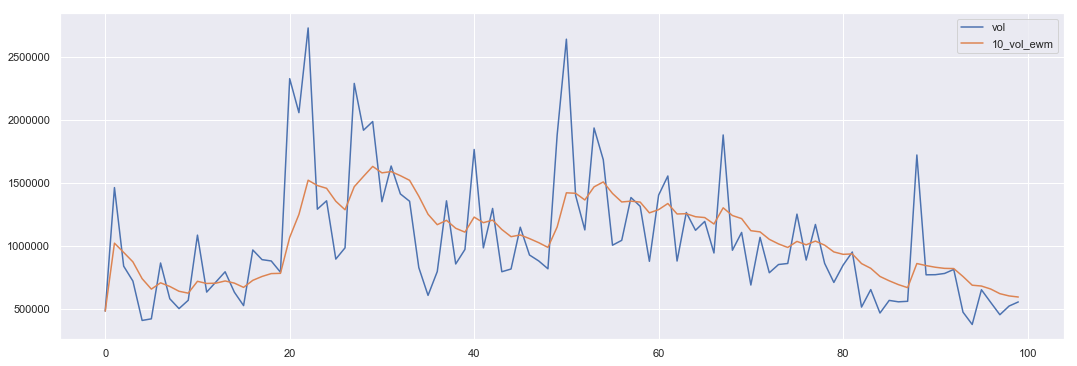

In [12]:
tickers[tickers['ts_code']=="000001.SZ"][['vol','10_vol_ewm']].plot(figsize = (18, 6))

In [14]:
# tickers_test['10_vol_ewm_rank'] = 
# df['normed_score'] = df.groupby(['ts'])[score_col].apply(lambda x: crrnt_norm_val_rank(x))
tickers['vol_rank'] = tickers.groupby(['trade_date'])['10_vol_ewm'].apply(lambda x: x.rank(ascending = False))

In [15]:
tickers

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount,10_vol_ewm,vol_rank
0,000001.SZ,2019-07-11,13.68,13.78,13.53,13.54,13.56,-0.02,-0.1475,484183.14,660588.299,4.841831e+05,38.0
1,000001.SZ,2019-07-12,13.60,14.23,13.58,14.12,13.54,0.58,4.2836,1465366.52,2055749.881,1.023834e+06,5.0
2,000001.SZ,2019-07-15,14.03,14.12,13.84,14.00,14.12,-0.12,-0.8499,841282.76,1175798.104,9.504496e+05,7.0
3,000001.SZ,2019-07-16,13.97,13.99,13.71,13.75,14.00,-0.25,-1.7857,722780.79,998151.578,8.754429e+05,9.0
4,000001.SZ,2019-07-17,13.70,13.81,13.61,13.69,13.75,-0.06,-0.4364,410020.63,561944.451,7.418328e+05,19.0
5,000001.SZ,2019-07-18,13.65,13.81,13.56,13.67,13.69,-0.02,-0.1461,422826.22,578067.487,6.589758e+05,23.0
6,000001.SZ,2019-07-19,13.74,14.08,13.68,13.99,13.67,0.32,2.3409,866390.70,1207316.526,7.089544e+05,19.0
7,000001.SZ,2019-07-22,13.96,14.02,13.76,13.85,13.99,-0.14,-1.0007,582283.30,807249.426,6.801361e+05,22.0
8,000001.SZ,2019-07-23,13.86,13.87,13.65,13.76,13.85,-0.09,-0.6498,504004.23,692328.447,6.418160e+05,21.0
9,000001.SZ,2019-07-24,13.87,14.01,13.79,13.88,13.76,0.12,0.8721,570276.22,793387.782,6.267886e+05,22.0


In [17]:
today = str(datetime.now().date())
vol_rank_condition = tickers['vol_rank']<=100
filtered_df = tickers[(tickers['trade_date']==today)&(vol_rank_condition)]
filtered_tickers = list(filtered_df['ts_code'].unique())

In [18]:
filtered_df

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount,10_vol_ewm,vol_rank
99,000001.SZ,2019-12-05,15.35,15.48,15.30,15.43,15.31,0.12,0.78,557084.46,857682.575,5.961485e+05,28.0
199,000002.SZ,2019-12-05,27.95,27.95,27.61,27.80,27.78,0.02,0.07,373263.56,1036876.654,5.568095e+05,33.0
4099,000050.SZ,2019-12-05,15.36,15.72,15.18,15.53,15.42,0.11,0.71,468164.14,724287.901,4.066975e+05,56.0
4899,000063.SZ,2019-12-05,31.19,32.15,31.04,31.95,31.18,0.77,2.47,852151.86,2711033.384,5.336174e+05,35.0
5099,000066.SZ,2019-12-05,15.75,15.92,15.51,15.82,15.78,0.04,0.25,953355.44,1500119.697,8.720604e+05,12.0
6099,000100.SZ,2019-12-05,3.94,3.98,3.89,3.95,3.94,0.01,0.25,2262432.17,892967.590,2.500078e+06,2.0
6699,000157.SZ,2019-12-05,5.98,6.10,5.93,6.04,5.95,0.09,1.51,364608.68,219803.413,2.974129e+05,98.0
7299,000338.SZ,2019-12-05,13.48,14.05,13.47,13.95,13.44,0.51,3.79,743695.72,1030240.842,5.300515e+05,36.0
9299,000425.SZ,2019-12-05,4.61,4.66,4.60,4.64,4.58,0.06,1.31,597311.08,276930.709,5.455228e+05,34.0
12799,000536.SZ,2019-12-05,2.69,2.80,2.69,2.73,2.73,0.00,0.00,669053.20,183207.770,6.417212e+05,23.0


In [19]:
filtered_tickers

['000001.SZ',
 '000002.SZ',
 '000050.SZ',
 '000063.SZ',
 '000066.SZ',
 '000100.SZ',
 '000157.SZ',
 '000338.SZ',
 '000425.SZ',
 '000536.SZ',
 '000587.SZ',
 '000595.SZ',
 '000609.SZ',
 '000636.SZ',
 '000651.SZ',
 '000662.SZ',
 '000671.SZ',
 '000673.SZ',
 '000676.SZ',
 '000713.SZ',
 '000717.SZ',
 '000723.SZ',
 '000725.SZ',
 '000727.SZ',
 '000800.SZ',
 '000835.SZ',
 '000859.SZ',
 '000876.SZ',
 '000932.SZ',
 '000933.SZ',
 '000977.SZ',
 '002017.SZ',
 '002024.SZ',
 '002027.SZ',
 '002036.SZ',
 '002045.SZ',
 '002063.SZ',
 '002065.SZ',
 '002079.SZ',
 '002091.SZ',
 '002100.SZ',
 '002108.SZ',
 '002124.SZ',
 '002129.SZ',
 '002131.SZ',
 '002152.SZ',
 '002156.SZ',
 '002157.SZ',
 '002161.SZ',
 '002185.SZ',
 '002195.SZ',
 '002210.SZ',
 '002217.SZ',
 '002235.SZ',
 '002236.SZ',
 '002237.SZ',
 '002241.SZ',
 '002247.SZ',
 '002256.SZ',
 '002273.SZ',
 '002276.SZ',
 '002280.SZ',
 '002332.SZ',
 '002340.SZ',
 '002351.SZ',
 '002369.SZ',
 '002384.SZ',
 '002405.SZ',
 '002415.SZ',
 '002418.SZ',
 '002426.SZ',
 '0024

In [31]:
tickers

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount,10_vol_ewm,vol_rank
0,000001.SZ,2019-07-11,13.68,13.78,13.53,13.54,13.56,-0.02,-0.1475,484183.14,660588.299,4.841831e+05,38.0
1,000001.SZ,2019-07-12,13.60,14.23,13.58,14.12,13.54,0.58,4.2836,1465366.52,2055749.881,1.023834e+06,5.0
2,000001.SZ,2019-07-15,14.03,14.12,13.84,14.00,14.12,-0.12,-0.8499,841282.76,1175798.104,9.504496e+05,7.0
3,000001.SZ,2019-07-16,13.97,13.99,13.71,13.75,14.00,-0.25,-1.7857,722780.79,998151.578,8.754429e+05,9.0
4,000001.SZ,2019-07-17,13.70,13.81,13.61,13.69,13.75,-0.06,-0.4364,410020.63,561944.451,7.418328e+05,19.0
5,000001.SZ,2019-07-18,13.65,13.81,13.56,13.67,13.69,-0.02,-0.1461,422826.22,578067.487,6.589758e+05,23.0
6,000001.SZ,2019-07-19,13.74,14.08,13.68,13.99,13.67,0.32,2.3409,866390.70,1207316.526,7.089544e+05,19.0
7,000001.SZ,2019-07-22,13.96,14.02,13.76,13.85,13.99,-0.14,-1.0007,582283.30,807249.426,6.801361e+05,22.0
8,000001.SZ,2019-07-23,13.86,13.87,13.65,13.76,13.85,-0.09,-0.6498,504004.23,692328.447,6.418160e+05,21.0
9,000001.SZ,2019-07-24,13.87,14.01,13.79,13.88,13.76,0.12,0.8721,570276.22,793387.782,6.267886e+05,22.0


In [27]:
filtered_tickers

['000001.SZ',
 '000002.SZ',
 '000050.SZ',
 '000063.SZ',
 '000066.SZ',
 '000100.SZ',
 '000157.SZ',
 '000338.SZ',
 '000425.SZ',
 '000536.SZ',
 '000587.SZ',
 '000595.SZ',
 '000609.SZ',
 '000636.SZ',
 '000651.SZ',
 '000662.SZ',
 '000671.SZ',
 '000673.SZ',
 '000676.SZ',
 '000713.SZ',
 '000717.SZ',
 '000723.SZ',
 '000725.SZ',
 '000727.SZ',
 '000800.SZ',
 '000835.SZ',
 '000859.SZ',
 '000876.SZ',
 '000932.SZ',
 '000933.SZ',
 '000977.SZ',
 '002017.SZ',
 '002024.SZ',
 '002027.SZ',
 '002036.SZ',
 '002045.SZ',
 '002063.SZ',
 '002065.SZ',
 '002079.SZ',
 '002091.SZ',
 '002100.SZ',
 '002108.SZ',
 '002124.SZ',
 '002129.SZ',
 '002131.SZ',
 '002152.SZ',
 '002156.SZ',
 '002157.SZ',
 '002161.SZ',
 '002185.SZ',
 '002195.SZ',
 '002210.SZ',
 '002217.SZ',
 '002235.SZ',
 '002236.SZ',
 '002237.SZ',
 '002241.SZ',
 '002247.SZ',
 '002256.SZ',
 '002273.SZ',
 '002276.SZ',
 '002280.SZ',
 '002332.SZ',
 '002340.SZ',
 '002351.SZ',
 '002369.SZ',
 '002384.SZ',
 '002405.SZ',
 '002415.SZ',
 '002418.SZ',
 '002426.SZ',
 '0024

In [28]:
def MACD(df, n_fast, n_slow, n_macd): # n_fast = 12, n_slow = 26
    """
    http://stockcharts.com/docs/doku.php?id=scans:indicators

    """
    """
    MACD, MACD Signal and MACD difference, rationale CHECKED, code CHECKED, updated
    # Conventional look-back window for calculating MACDsign is 9
    """
    EMAfast = df['close'].ewm(span = n_fast, min_periods = n_fast - 1).mean()
    EMAslow = df['close'].ewm(span = n_slow, min_periods = n_slow - 1).mean()
    MACD = pd.Series(EMAfast - EMAslow, name = 'MACD_' + str(n_fast) + '_' + str(n_slow))
    MACDsign = MACD.ewm(span = n_macd, min_periods = n_macd-1).mean().rename('MACDsign_' + str(n_fast) + '_' + str(n_slow))
    MACDdiff = pd.Series(MACD - MACDsign, name = 'MACDdiff_' + str(n_fast) + '_' + str(n_slow))
    df['MACD_Diff'] = MACD
    df['MACD_Diff_EMA'] = MACDsign
    df['MACD'] = MACDdiff
    df['MACD_signal'] = df['MACD'].apply(lambda x: "多头信号" if x>0 else ("空头信号" if x<0 else "空仓信号"))
#     return MACD, MACDsign, MACDdiff
    return df

/Users/miaoyuesun/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/miaoyuesun/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/miaoyuesun/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

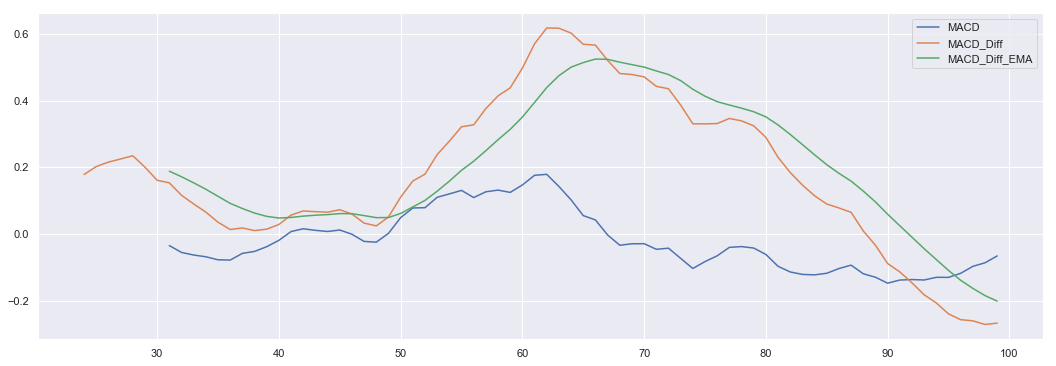

In [37]:
MACD(tickers[tickers['ts_code']=="000001.SZ"], 12, 26, 9)[['MACD','MACD_Diff','MACD_Diff_EMA']].plot(figsize = (18,6))

In [29]:
signal_record = []
for ticker in filtered_tickers:
    print("Calculating Signal for: ", ticker)
    try:
        single_ticker_df = tickers[tickers['ts_code']==ticker]
        signal_df = MACD(single_ticker_df, 12, 26, 9)
        last_signal = signal_df[['ts_code','MACD_signal']].values[-1]
        signal_record.append(last_signal)
    except:
        pass

Calculating Signal for:  000001.SZ


/Users/miaoyuesun/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/miaoyuesun/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/miaoyuesun/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

Calculating Signal for:  000002.SZ
Calculating Signal for:  000050.SZ
Calculating Signal for:  000063.SZ
Calculating Signal for:  000066.SZ
Calculating Signal for:  000100.SZ
Calculating Signal for:  000157.SZ
Calculating Signal for:  000338.SZ
Calculating Signal for:  000425.SZ
Calculating Signal for:  000536.SZ
Calculating Signal for:  000587.SZ
Calculating Signal for:  000595.SZ
Calculating Signal for:  000609.SZ
Calculating Signal for:  000636.SZ
Calculating Signal for:  000651.SZ
Calculating Signal for:  000662.SZ
Calculating Signal for:  000671.SZ
Calculating Signal for:  000673.SZ
Calculating Signal for:  000676.SZ
Calculating Signal for:  000713.SZ
Calculating Signal for:  000717.SZ
Calculating Signal for:  000723.SZ
Calculating Signal for:  000725.SZ
Calculating Signal for:  000727.SZ
Calculating Signal for:  000800.SZ
Calculating Signal for:  000835.SZ
Calculating Signal for:  000859.SZ
Calculating Signal for:  000876.SZ
Calculating Signal for:  000932.SZ
Calculating Signal f

In [30]:
signal_record

[array(['000001.SZ', '空头信号'], dtype=object),
 array(['000002.SZ', '多头信号'], dtype=object),
 array(['000050.SZ', '多头信号'], dtype=object),
 array(['000063.SZ', '多头信号'], dtype=object),
 array(['000066.SZ', '空头信号'], dtype=object),
 array(['000100.SZ', '多头信号'], dtype=object),
 array(['000157.SZ', '空头信号'], dtype=object),
 array(['000338.SZ', '多头信号'], dtype=object),
 array(['000425.SZ', '多头信号'], dtype=object),
 array(['000536.SZ', '多头信号'], dtype=object),
 array(['000587.SZ', '多头信号'], dtype=object),
 array(['000595.SZ', '空头信号'], dtype=object),
 array(['000609.SZ', '空头信号'], dtype=object),
 array(['000636.SZ', '多头信号'], dtype=object),
 array(['000651.SZ', '多头信号'], dtype=object),
 array(['000662.SZ', '多头信号'], dtype=object),
 array(['000671.SZ', '多头信号'], dtype=object),
 array(['000673.SZ', '空头信号'], dtype=object),
 array(['000676.SZ', '空头信号'], dtype=object),
 array(['000713.SZ', '多头信号'], dtype=object),
 array(['000717.SZ', '多头信号'], dtype=object),
 array(['000723.SZ', '多头信号'], dtype=object),
 array(['0

In [32]:
signal_df

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount,10_vol_ewm,vol_rank,MACD_Diff,MACD_Diff_EMA,MACD,MACD_signal
139193,002967.SZ,2019-11-08,8.92,10.70,8.92,10.70,7.43,3.27,44.0108,3564.93,3804.256,3564.930000,1387.0,NaN,NaN,NaN,空仓信号
139194,002967.SZ,2019-11-11,11.77,11.77,11.77,11.77,10.70,1.07,10.0000,2536.15,2985.048,2999.101000,1390.0,NaN,NaN,NaN,空仓信号
139195,002967.SZ,2019-11-12,12.95,12.95,12.95,12.95,11.77,1.18,10.0255,1649.83,2136.529,2456.703023,1391.0,NaN,NaN,NaN,空仓信号
139196,002967.SZ,2019-11-13,14.25,14.25,14.25,14.25,12.95,1.30,10.0386,1932.06,2753.185,2283.856522,1388.0,NaN,NaN,NaN,空仓信号
139197,002967.SZ,2019-11-14,15.68,15.68,15.68,15.68,14.25,1.43,10.0351,12468.53,19550.655,5207.599280,1378.0,NaN,NaN,NaN,空仓信号
139198,002967.SZ,2019-11-15,17.25,17.25,17.25,17.25,15.68,1.57,10.0128,6322.01,10905.467,5497.050238,1369.0,NaN,NaN,NaN,空仓信号
139199,002967.SZ,2019-11-18,18.98,18.98,18.98,18.98,17.25,1.73,10.0290,16984.99,32237.511,8265.182239,1342.0,NaN,NaN,NaN,空仓信号
139200,002967.SZ,2019-11-19,20.88,20.88,20.88,20.88,18.98,1.90,10.0105,4605.41,9616.096,7432.566417,1353.0,NaN,NaN,NaN,空仓信号
139201,002967.SZ,2019-11-20,22.97,22.97,22.97,22.97,20.88,2.09,10.0096,3303.93,7589.127,6534.319611,1362.0,NaN,NaN,NaN,空仓信号
139202,002967.SZ,2019-11-21,25.27,25.27,24.40,25.27,22.97,2.30,10.0131,342831.50,863048.477,77175.615621,516.0,NaN,NaN,NaN,空仓信号


510050 - 华夏上证50ETF

In [16]:
#抓取历史数据
def GetHistoryData(Code, BeginTime, EndTime):
    df = ts.get_k_data(Code, index = False,  start = BeginTime, end = EndTime)
    return df

df_300_hist = GetHistoryData("510300", "2010-01-01", today)
df_nas_hist = GetHistoryData("513100", "2010-01-01", today)

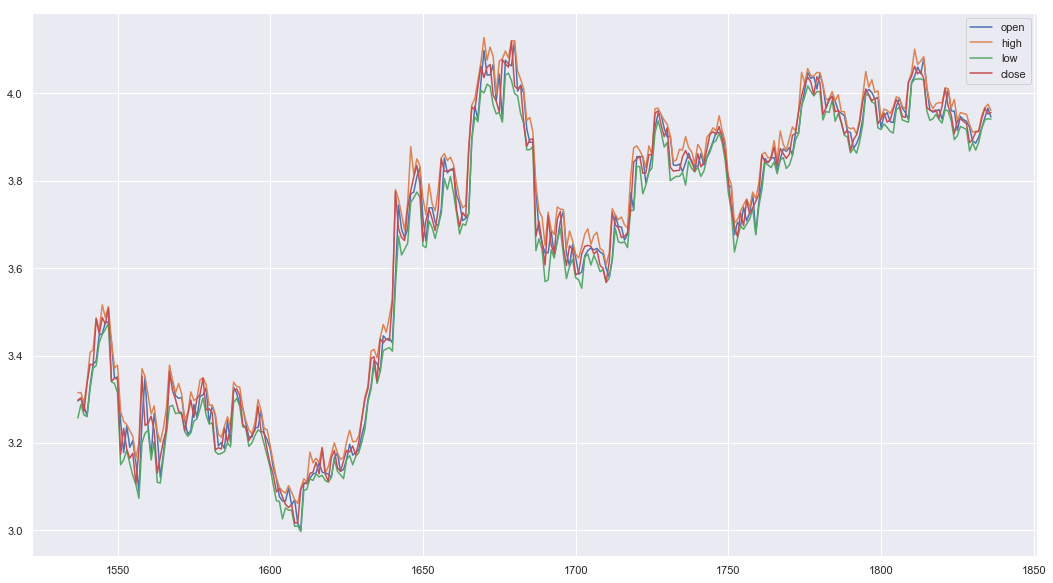

In [20]:
df_300_hist[['open','high','low','close']].tail(300).plot(figsize = (18,10))